In [7]:
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm


IMG_PATH = Path("images/2022-10-20_10H09M52S697MS_CHECK_ARTEFACT_grid_stack_i.png")
REF_IMG_PATH = Path("images/2022-10-20_10H09M52S697MS_grid_stack_i_color_ref.png")

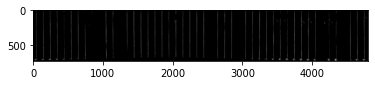

In [2]:
image = cv2.imread(str(IMG_PATH), flags=cv2.IMREAD_ANYDEPTH)

plt.imshow(image, cmap='gray')

In [3]:
def hsv_to_bgr(hsv, depth=255):
    hsv_norm = hsv / np.array([1, 100, 100])
    h = hsv_norm[0] % 360
    s = hsv_norm[1]
    v = hsv_norm[2]
    c = v*s
    x = c * (1 - abs((h/60)%2 - 1))
    m = np.expand_dims(v - c, -1)

    rgb_choices = np.array([[c, x, 0],
                            [x, c, 0],
                            [0, c, x],
                            [0, x, c],
                            [x, 0, c],
                            [c, 0, x]])
    choice = int(h/60)
    rgb_prime = rgb_choices[choice, :]
    rgb = (rgb_prime + m) * depth
    bgr = rgb[::-1] 
    return bgr

100%|██████████| 722/722 [00:57<00:00, 12.66it/s]


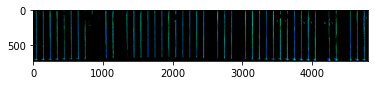

In [9]:
GRAY_MAX = 30000
GRAY_MIN = 0
gray_range = GRAY_MAX - GRAY_MIN

bgr_val = np.array([1000, 42000, 8500])

# Pick low and high values in hue space. Pixel values will be mapped to be an interpolation in hue space between these values
H_LOW = 120
H_HIGH = 240
h_range = H_HIGH - H_LOW

# Map 16-bit gray pixel values to float hue values
hsv_image = np.ones(image.shape + (3,))*100
hue = ((image - GRAY_MIN) * (h_range/gray_range)) + H_LOW

# Make background black
BLACK_TOLERANCE = 1
black_mask = hue < BLACK_TOLERANCE + H_LOW
hsv_image[:,:,0] = hue
hsv_image[black_mask] = 0

image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

for i in tqdm(range(image_color.shape[0])):
    for j in range(image_color.shape[1]):
        image_color[i,j,:] = hsv_to_bgr(hsv_image[i,j,:])


plt.imshow(image_color[:,:,::-1])
